In [5]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.fresnel_coro_1dm as fresnel
import apra_pop_models.utils as utils
import apra_pop_models.props as props
from apra_pop_models.imshows import imshow1, imshow2, imshow3

/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models
influence function sampling 31.25
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


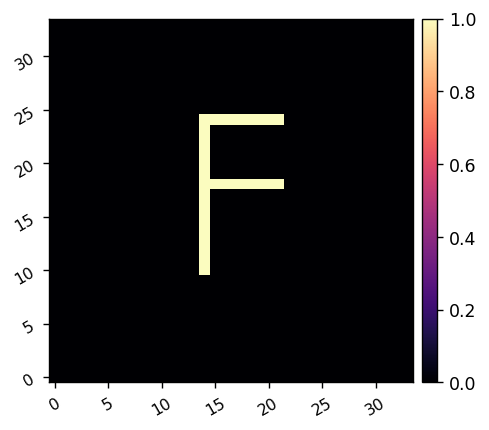

Propagating wavelength 650.000 nm.
PSF calculated in 0.120s


In [11]:
reload(fresnel)
reload(apra_pop_models.props)
M = fresnel.CORO()

f_command = xp.zeros((M.Nact, M.Nact))
f_command[10:24,14] = 1
f_command[24,14:22] = 1
f_command[18,14:22] = 1
imshow1(f_command)

M.set_dm(f_command * 10e-9)
wfs = M.calc_wfs()

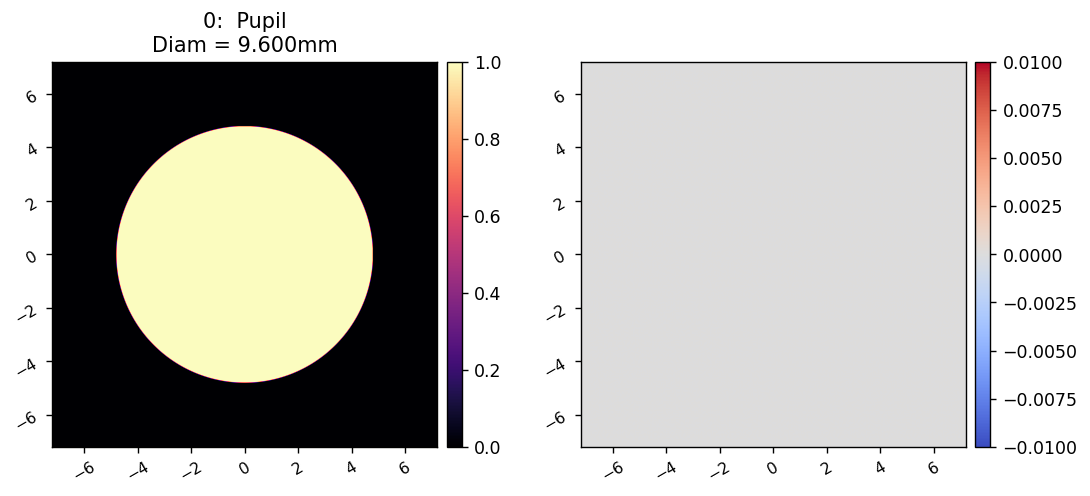

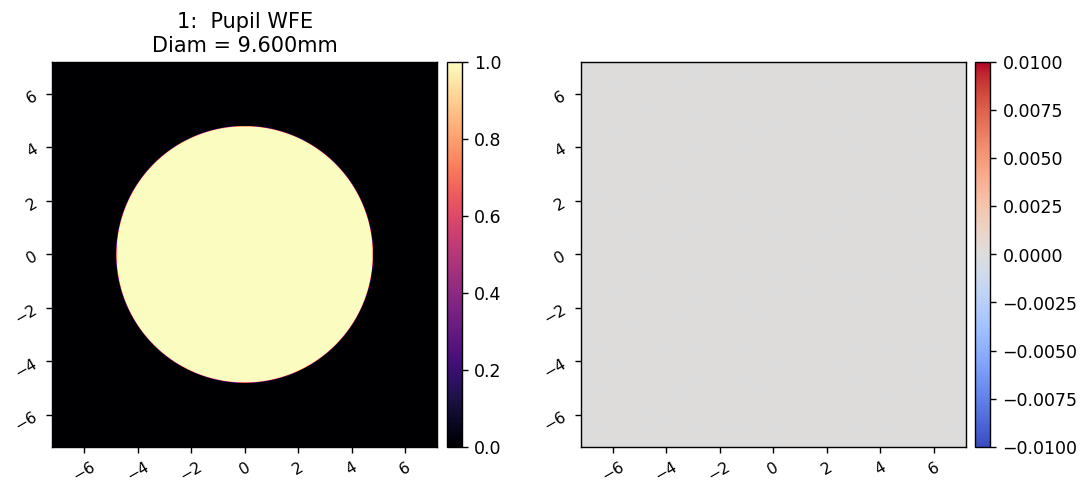

Focal Plane Correction:  -0.0012600143108887352 mm


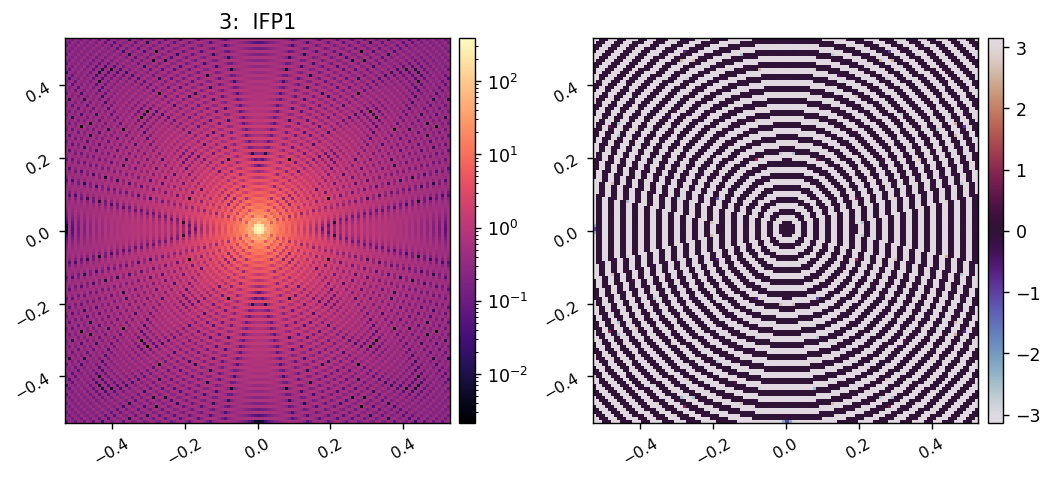

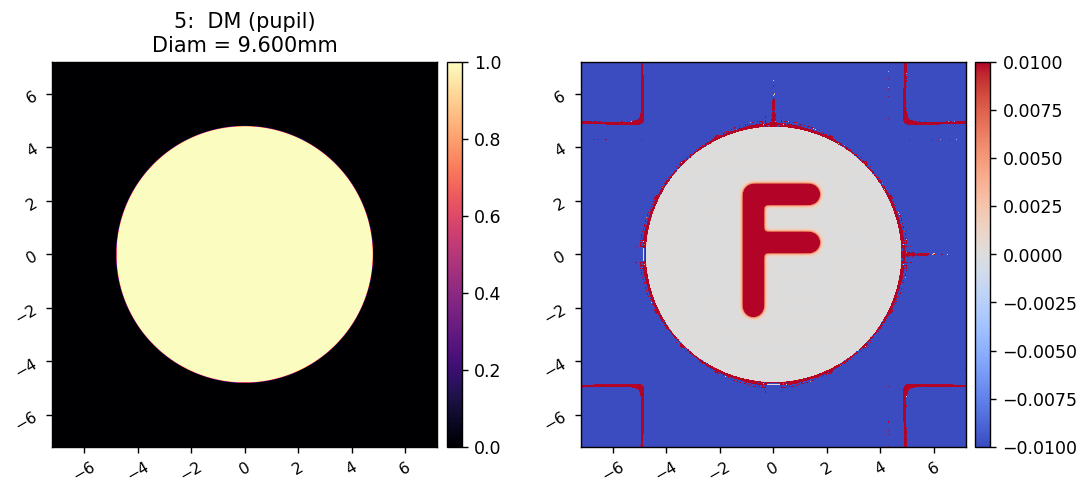

Focal Plane Correction:  -0.01007986047163456 mm


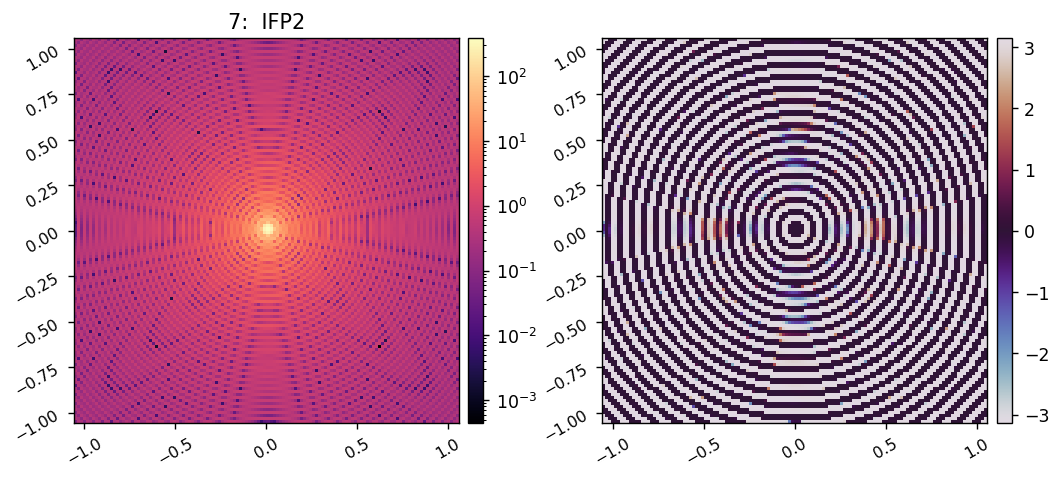

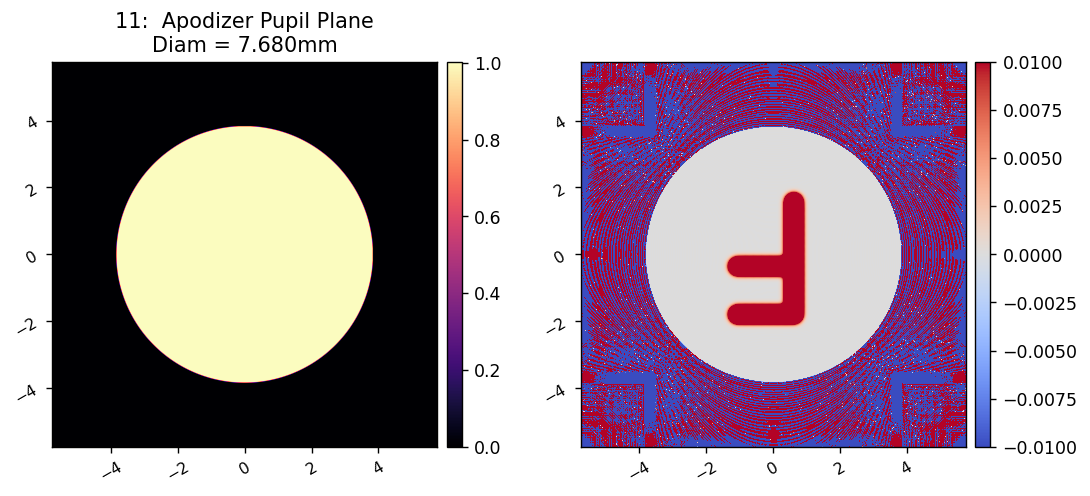

Focal Plane Correction:  -2100.0125996509605 mm


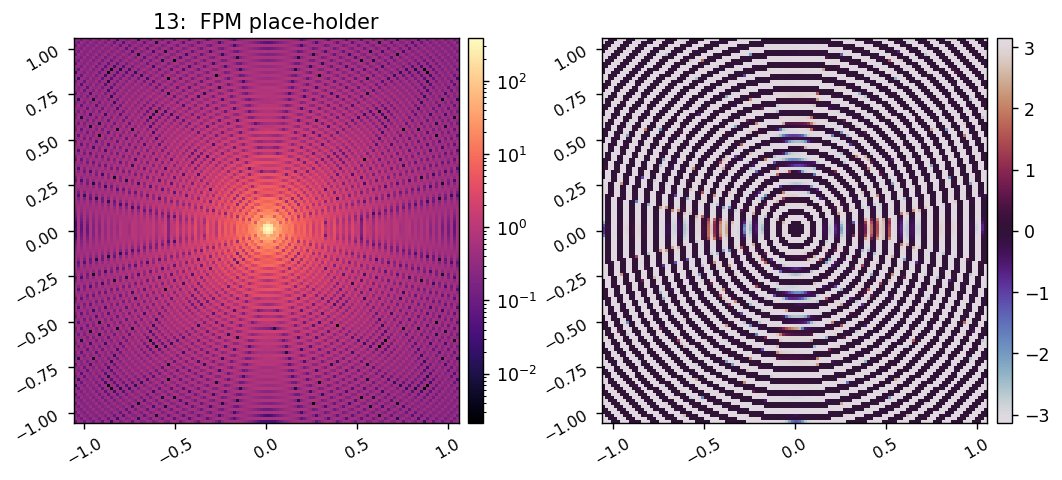

Focal Plane Correction:  -0.0125996509607873 mm


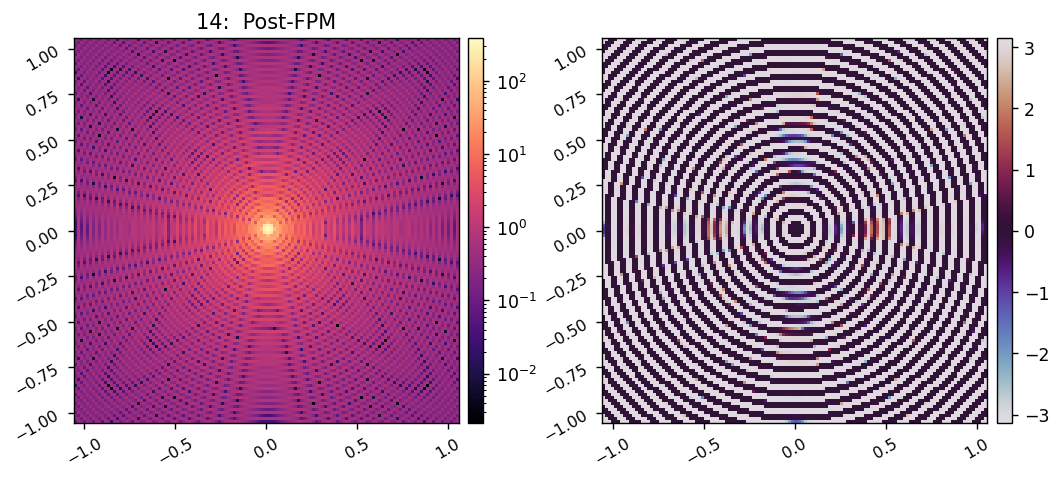

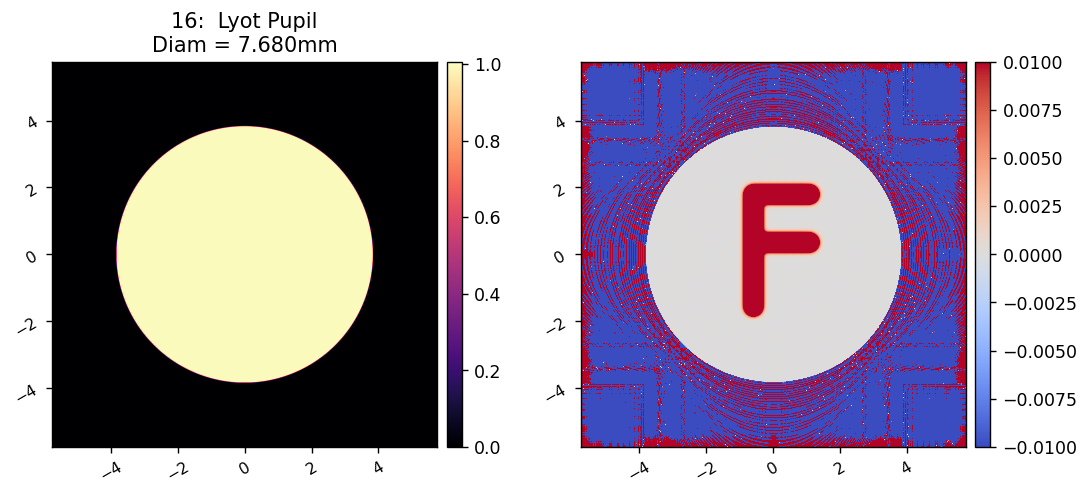

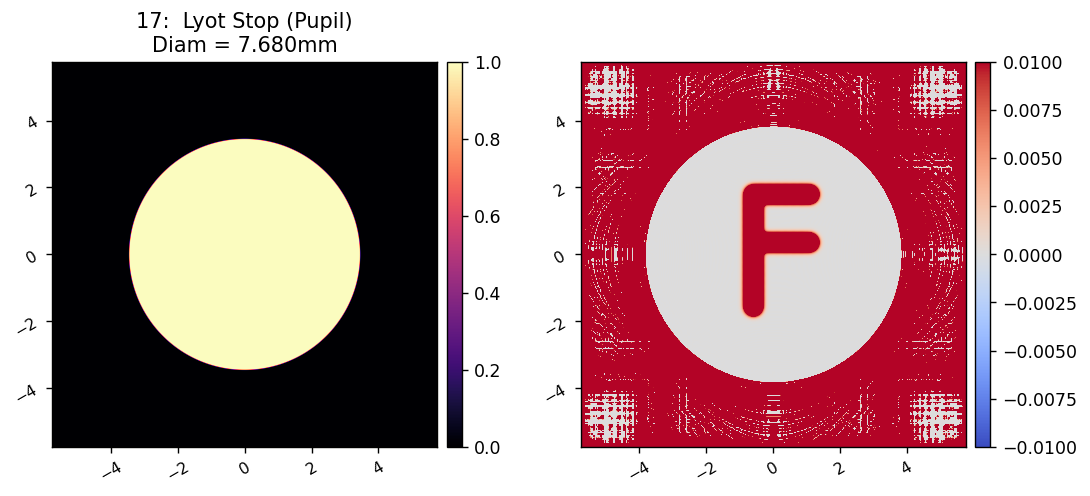

Focal Plane Correction:  -0.0030761184541816533 mm


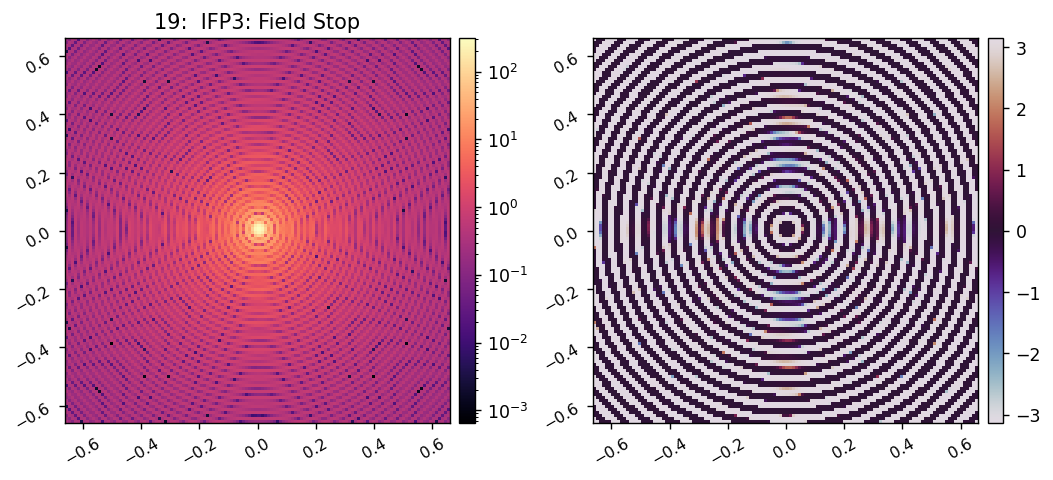

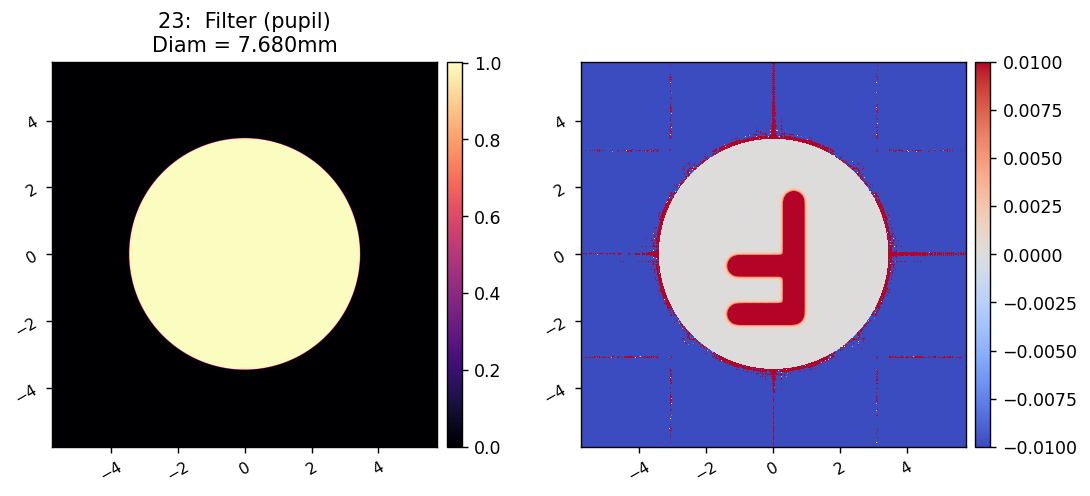

Focal Plane Correction:  -0.0006644442027692321 mm


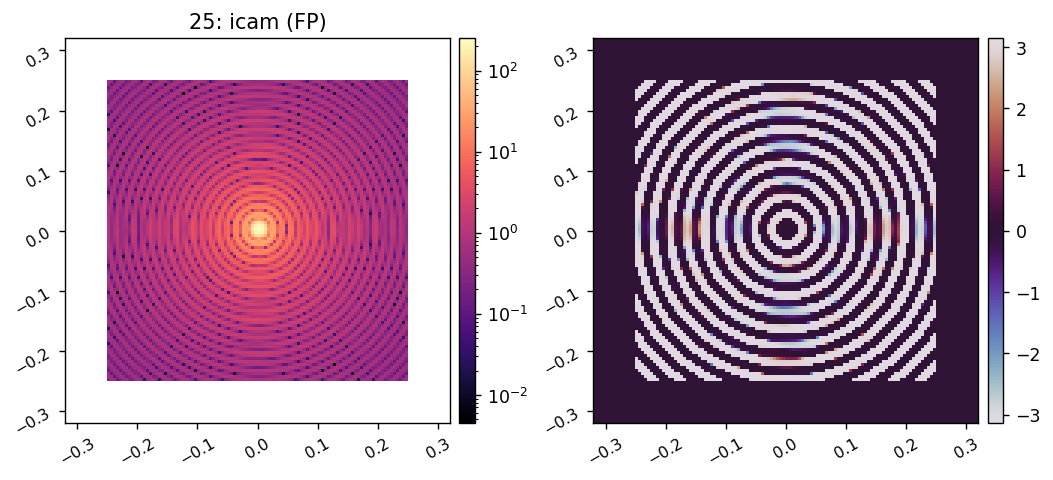

In [12]:
for i,wf in enumerate(wfs):
    if 'fp' in wf.location.lower():
        f_corr = wf.z_w0 - wf.z
        print('Focal Plane Correction: ', f_corr.to(u.mm))
        pxscl_mm = wf.pixelscale.to_value(u.mm/u.pix)
        imshow2(wf.amplitude, wf.phase, f'{i:d}: '+wf.location[5:], pxscl=pxscl_mm, npix=128, lognorm1=True, cmap2='twilight',)
    elif 'pupil' in wf.location.lower():
        imshow2(wf.amplitude, wf.phase, f'{i:d}: '+wf.location[5:] + f'\nDiam = {2*wf.spot_radius().to_value(u.mm):.3f}mm', 
                pxscl=wf.pixelscale.to(u.mm/u.pix), npix=1.5*M.npix, vmin2=-0.01, vmax2=0.01, cmap2='coolwarm',)

/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models
influence function sampling 31.25
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Propagating wavelength 650.000 nm.


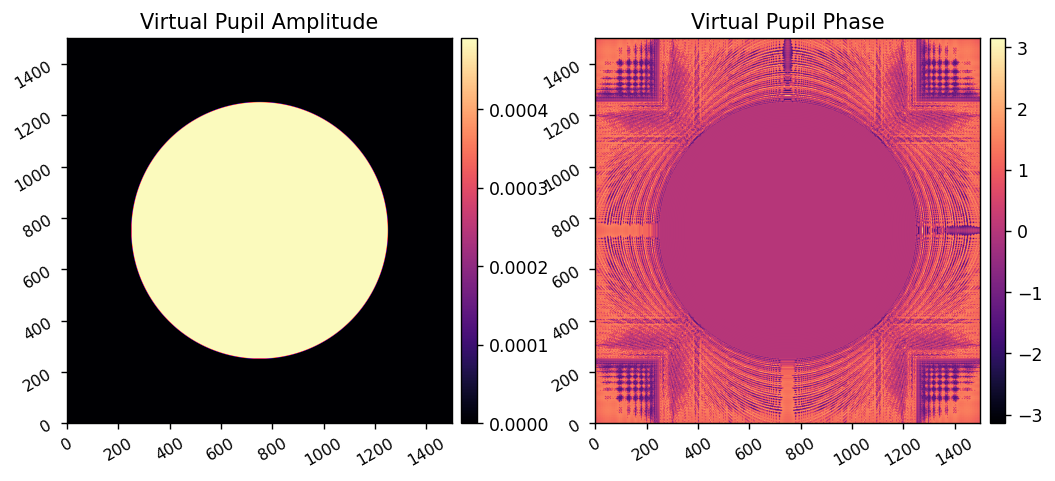

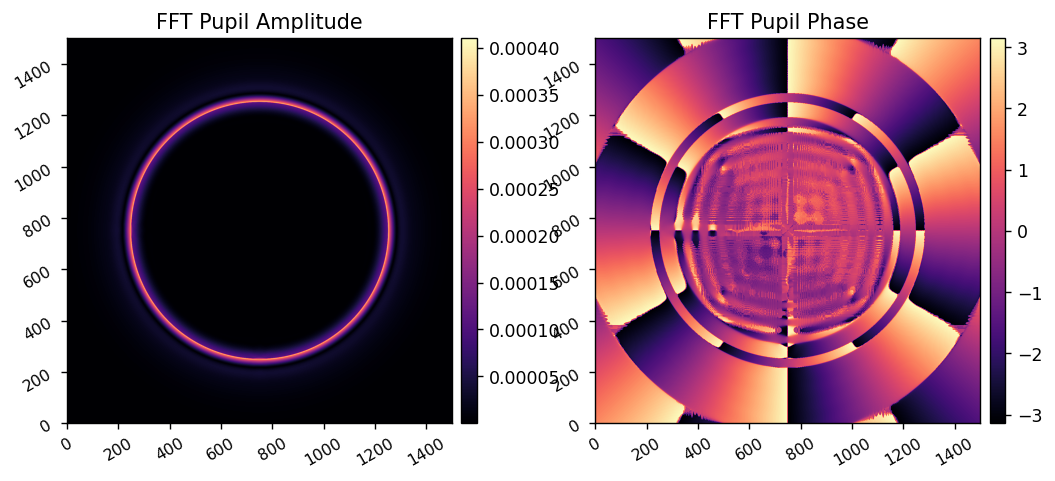

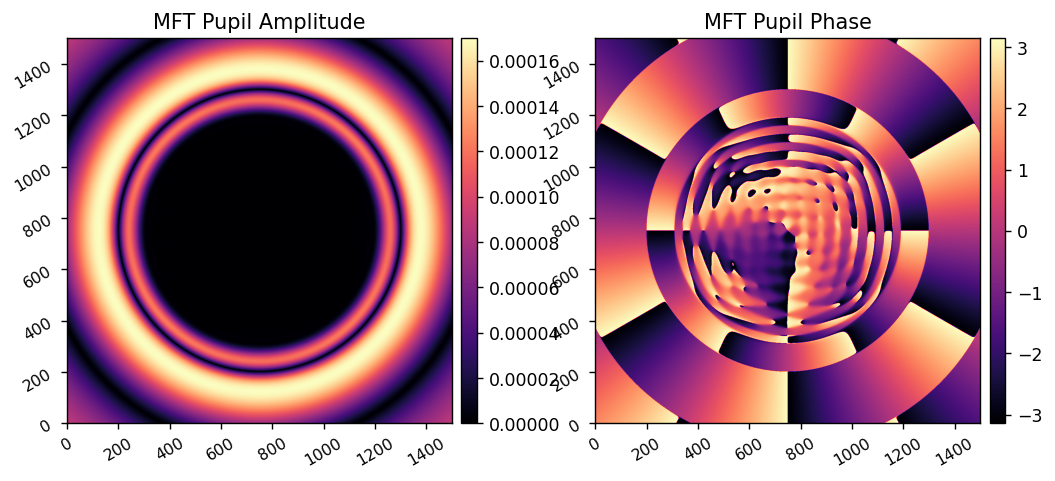

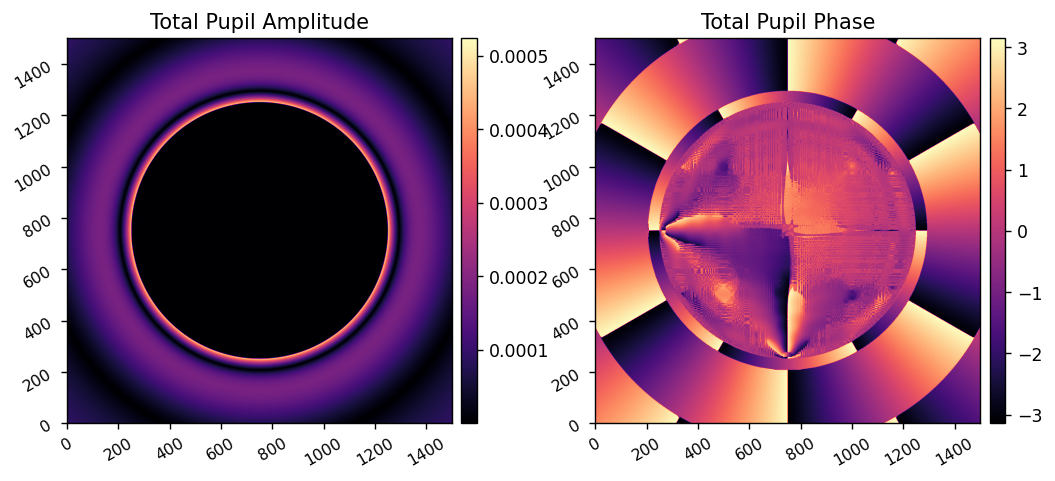

PSF calculated in 2.413s


In [14]:
reload(fresnel)
reload(apra_pop_models.props)
M = fresnel.CORO()

M.use_vortex = True
M.plot_vortex = True
wfs = M.calc_wfs()

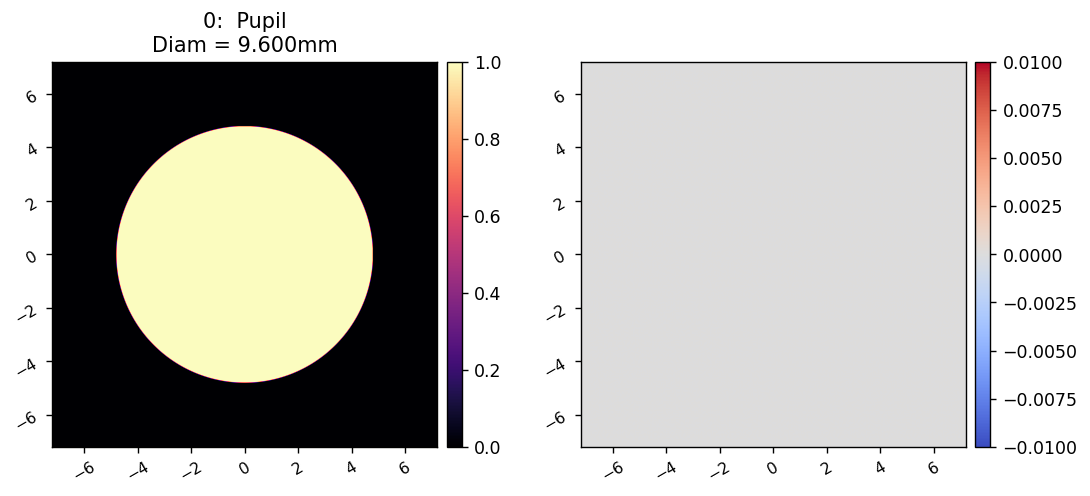

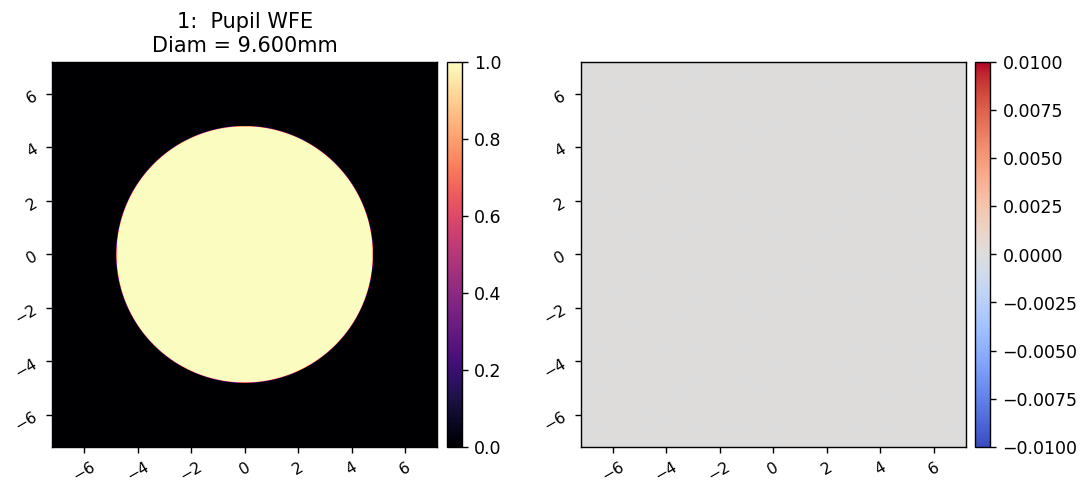

Focal Plane Correction:  -0.0012600143108887352 mm


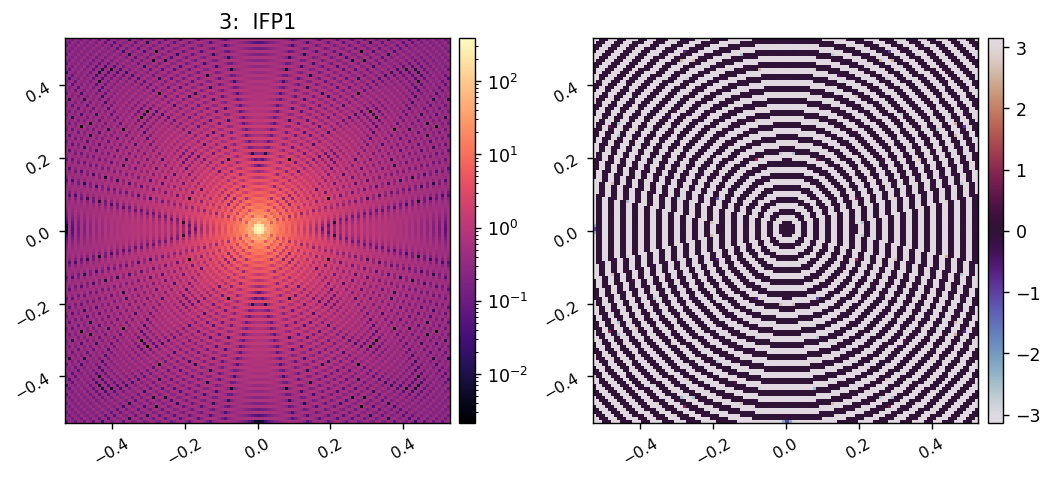

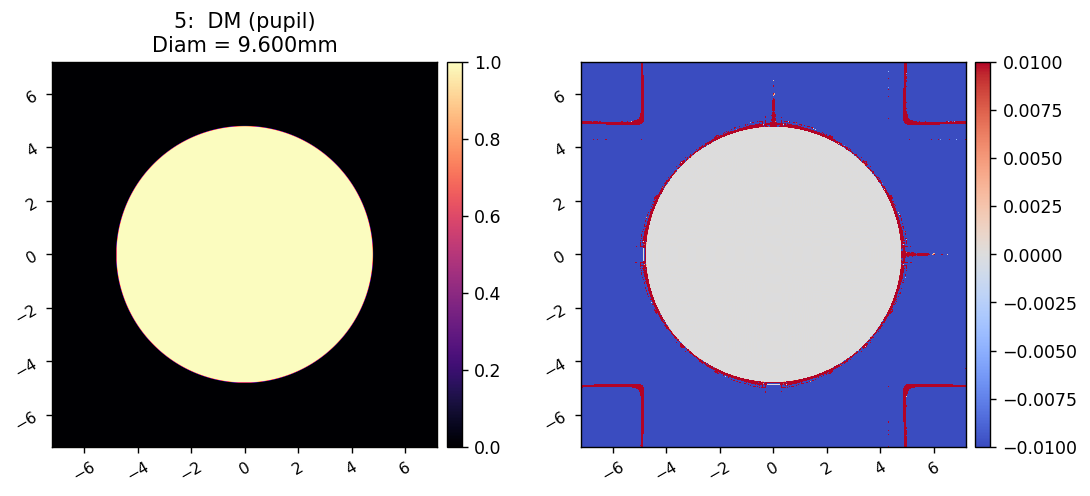

Focal Plane Correction:  -0.01007986047163456 mm


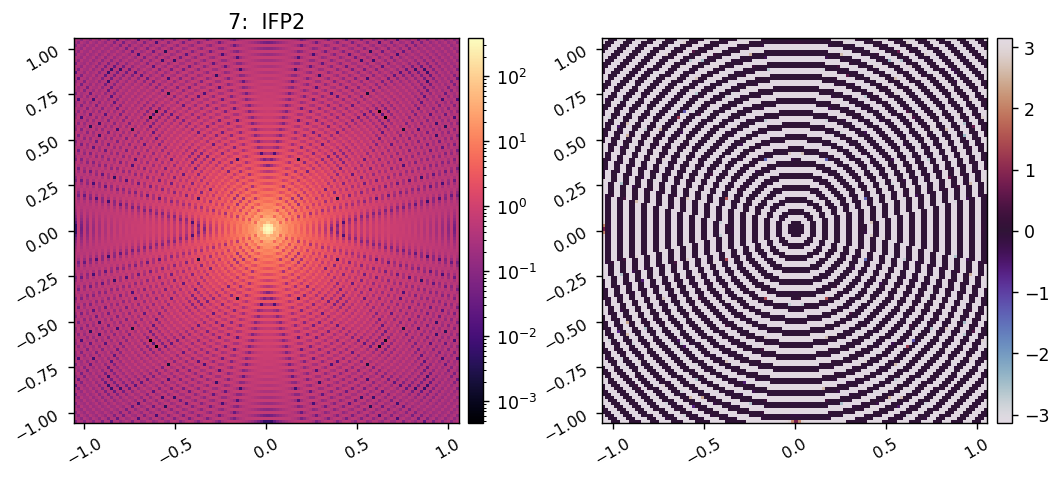

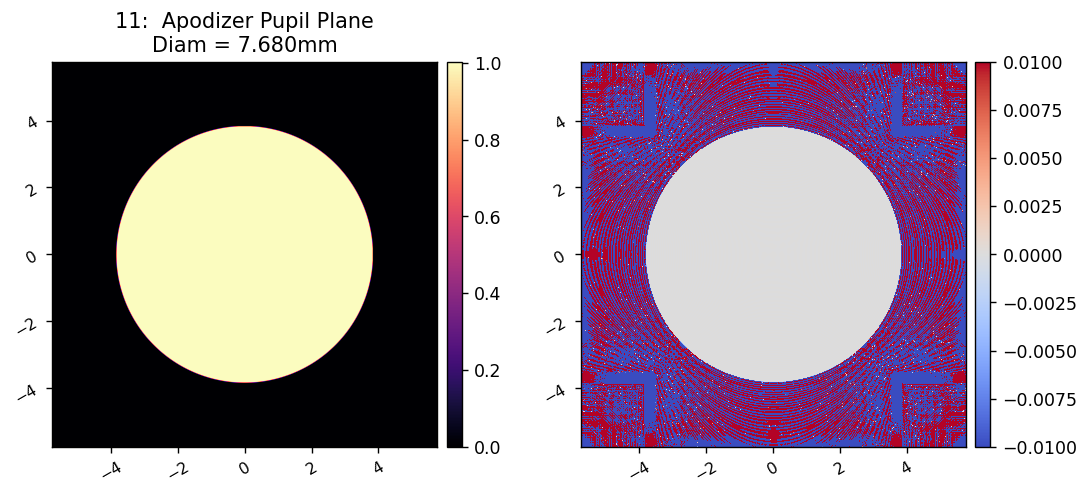

Focal Plane Correction:  -2100.0125996509605 mm


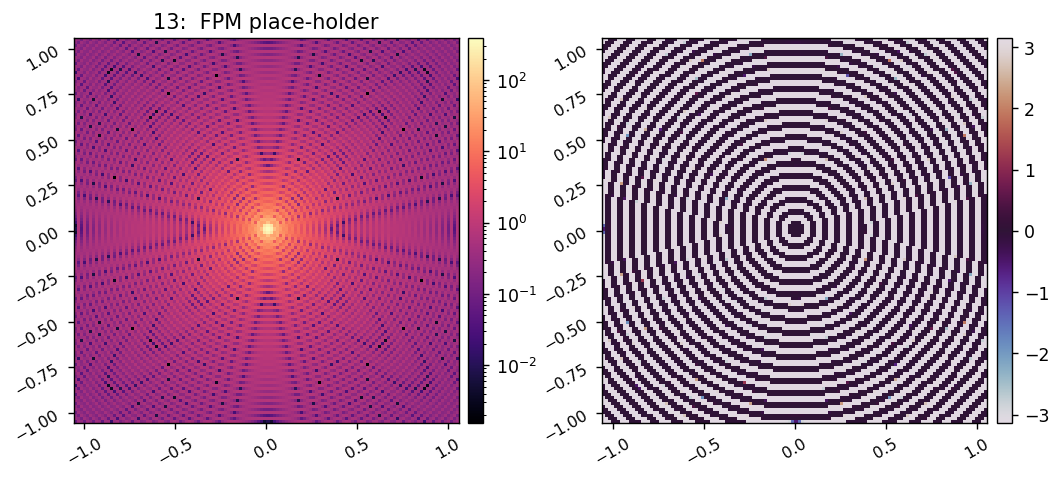

Focal Plane Correction:  -0.0125996509607873 mm


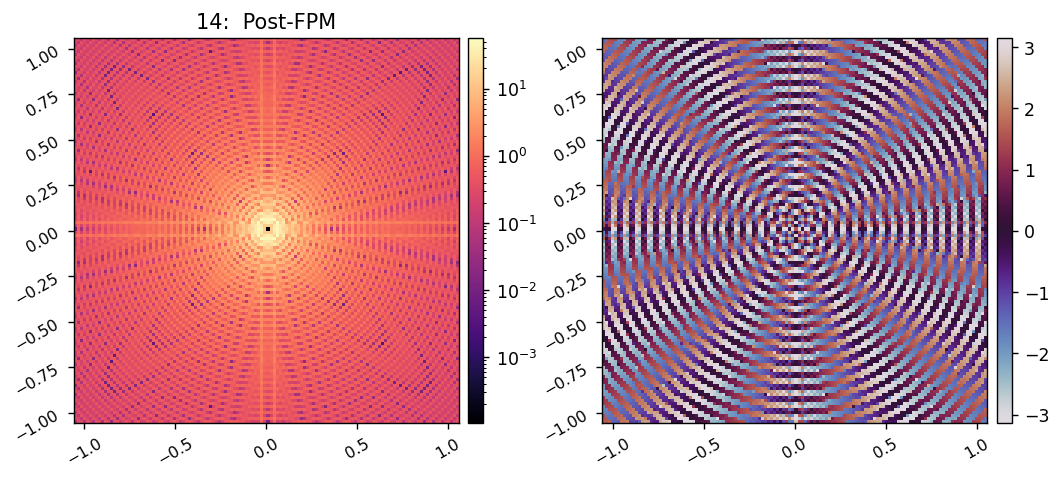

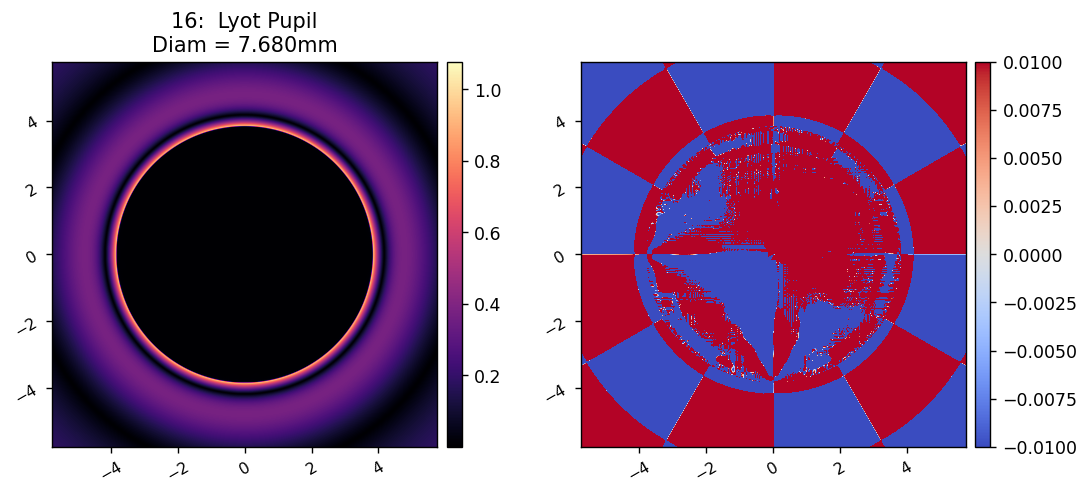

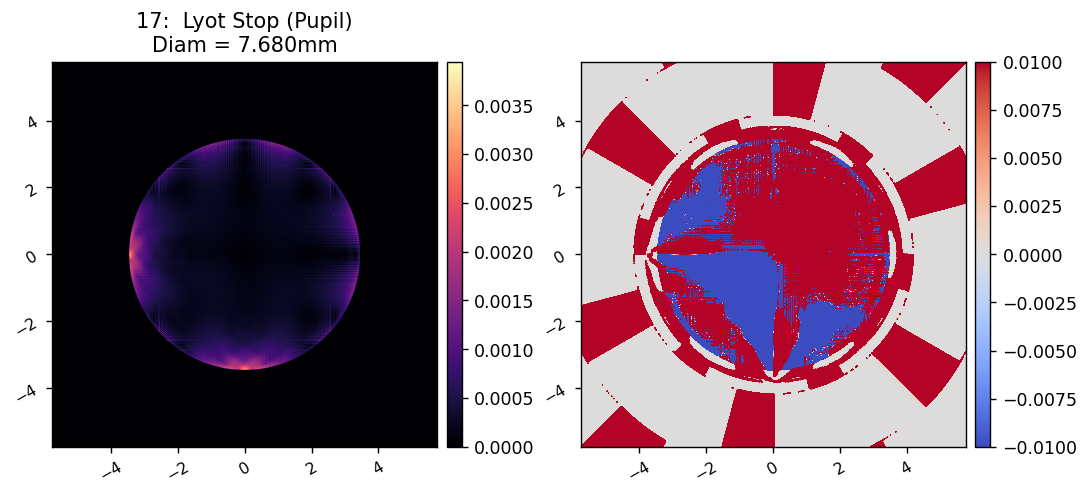

Focal Plane Correction:  -0.0030761184541816533 mm


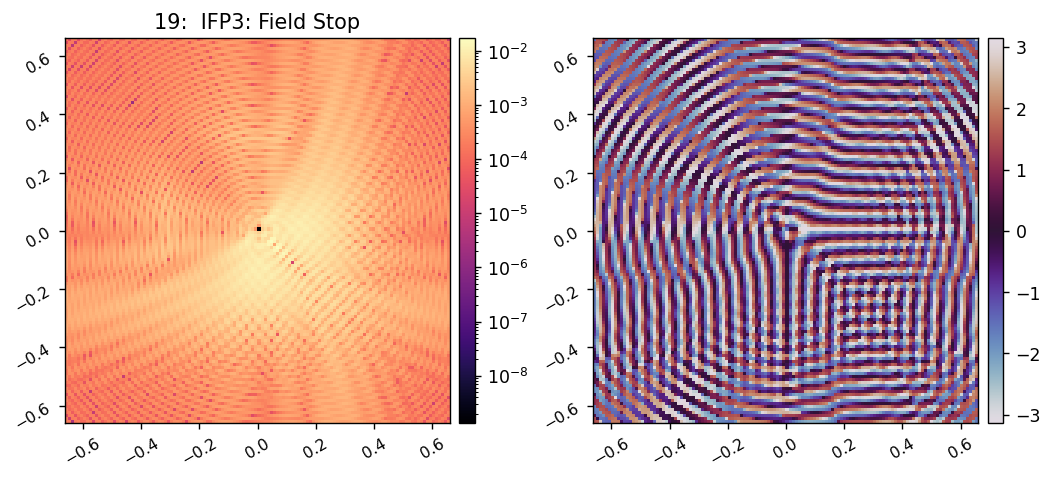

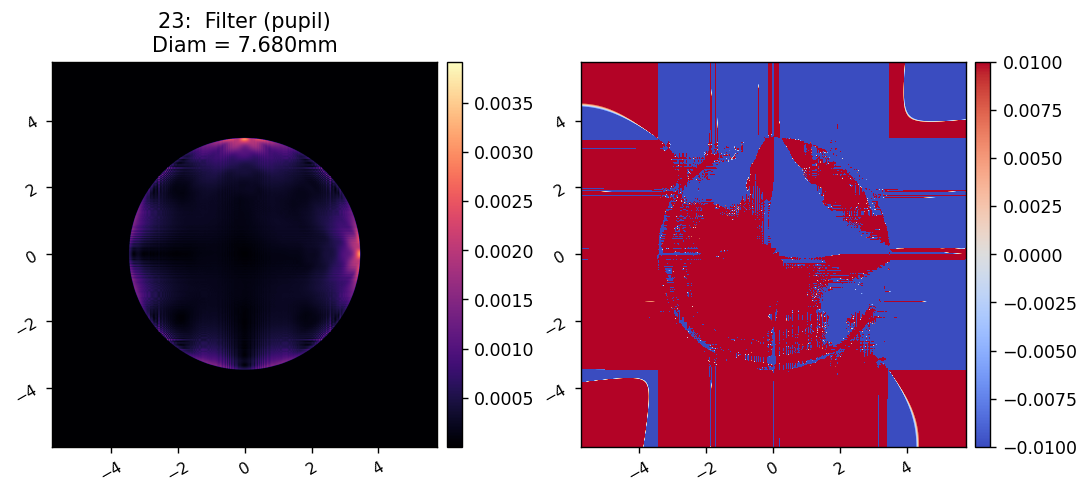

Focal Plane Correction:  -0.0006644442027692321 mm


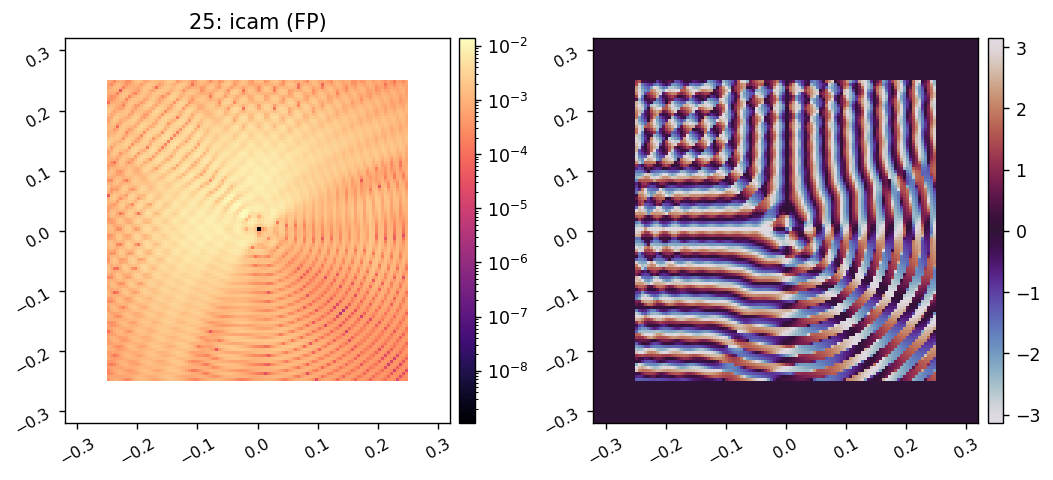

In [15]:
for i,wf in enumerate(wfs):
    if 'fp' in wf.location.lower():
        f_corr = wf.z_w0 - wf.z
        print('Focal Plane Correction: ', f_corr.to(u.mm))
        pxscl_mm = wf.pixelscale.to_value(u.mm/u.pix)
        imshow2(wf.amplitude, wf.phase, f'{i:d}: '+wf.location[5:], pxscl=pxscl_mm, npix=128, lognorm1=True, cmap2='twilight',)
    elif 'pupil' in wf.location.lower():
        imshow2(wf.amplitude, wf.phase, f'{i:d}: '+wf.location[5:] + f'\nDiam = {2*wf.spot_radius().to_value(u.mm):.3f}mm', 
                pxscl=wf.pixelscale.to(u.mm/u.pix), npix=1.5*M.npix, vmin2=-0.01, vmax2=0.01, cmap2='coolwarm',)

In [11]:
M.psf_pixelscale_lamDc

0.35446153846153855

In [10]:
7.68*0.9

6.912